In [2]:
import pandas as pd
import numpy as np
from numpy import array, arange, abs as np_abs
from numpy.fft import rfft, rfftfreq, fft, ifft
from numpy.random import uniform
from math import sin, pi
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import signal

In [3]:
sns.set(rc={'figure.figsize': (12,8)})

## 50 Hz filtering with fft

In [312]:
df = pd.read_csv(r"E:\а ритмы.dat", sep="\t", 
                 names=['ch0', 'ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9']) \
                .reset_index()

In [313]:
df = df.drop(['ch7', 'ch8', 'ch9', 'index'], axis=1) # drop fake channels

In [308]:
df = df[df.columns][:6000]

In [314]:
df

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,466,454,513,724,559,585,525
1,473,469,501,687,580,561,567
2,498,487,493,659,537,543,537
3,451,455,491,506,602,614,507
4,480,456,490,583,553,576,489
...,...,...,...,...,...,...,...
10009,524,520,533,519,481,567,528
10010,521,520,531,508,500,567,530
10011,515,508,529,493,504,530,515
10012,520,512,531,491,501,524,490


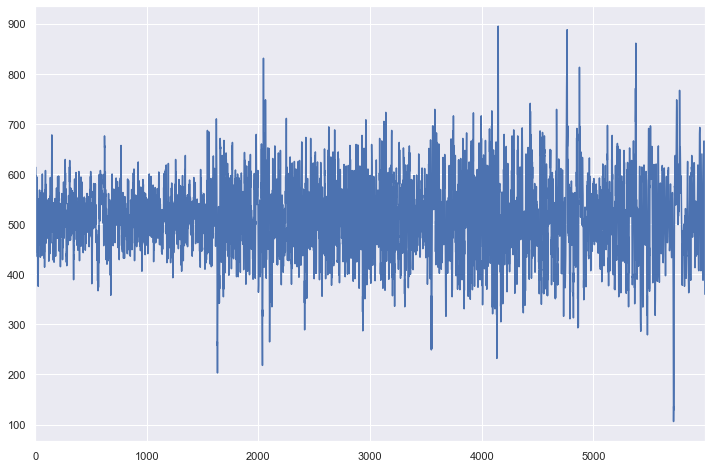

In [311]:
df["ch5"].plot()

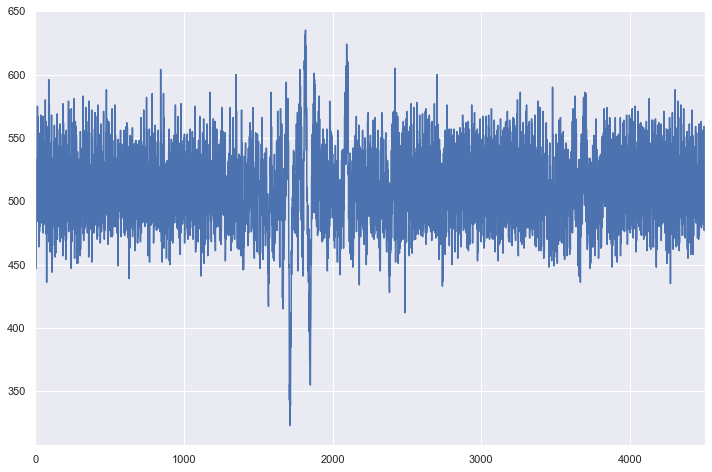

In [258]:
df.ch1.plot()

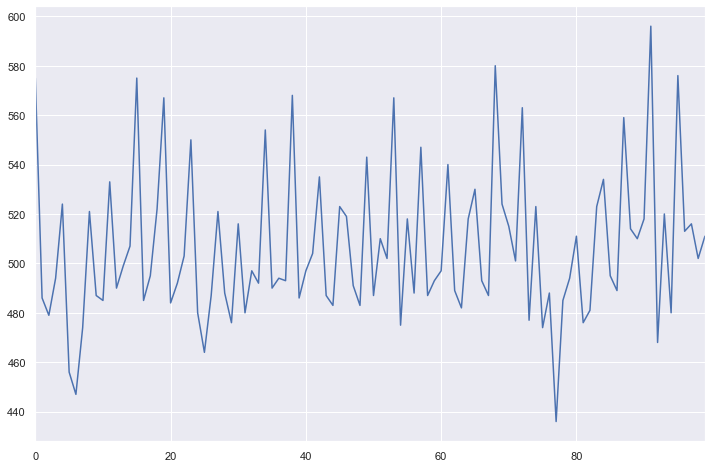

In [259]:
df["ch1"][:100].plot()

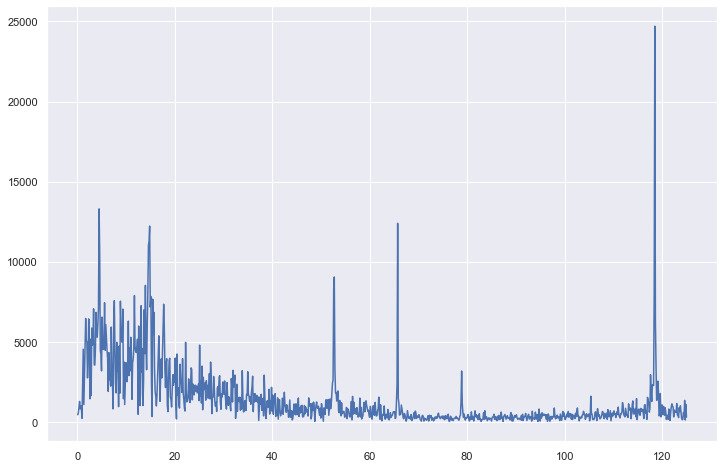

In [318]:
import numpy as np
import pylab as pl
rate = 250.0
t = np.arange(0, 5000, 1/rate)
x = df.ch5[:2000].copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

In [ ]:
import numpy as np
import pylab as pl
rate = 250.0
t = np.arange(0, 5000, 1/rate)
x = df.ch5[5000:].copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

In [305]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

fs = 250  # Sampling frequency
# Generate the time vector properly
t = np.arange(4505) / fs
data_filt = df.copy()
for signal_i in df.columns:
    signala = df[signal_i].copy() # with frequency of 250

    fc = 50  # Cut-off frequency of the filter
    w = fc / (fs / 2) # Normalize the frequency
    b, a = signal.butter(1, w)
    data_filt[signal_i] = signal.filtfilt(b, a, signala)

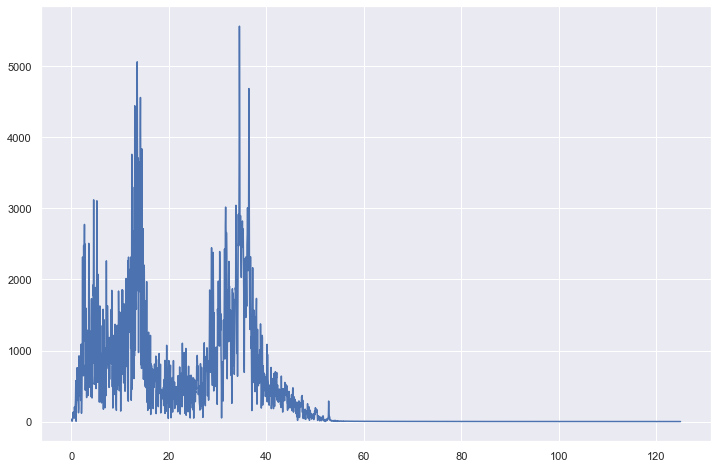

In [304]:
import numpy as np
import pylab as pl 
rate = 250.0
t = np.arange(0, 4505, 1/rate)
x = data_filt.ch2.copy()
p = np.abs(np.fft.rfft(x))
f = np.linspace(0, rate/2, len(p))
pl.plot(f[1:], p[1:])

In [282]:
len(p)

2253

In [242]:
fs = 250.0  # Sample frequency (Hz)
f0 = 50.0  # Frequency to be removed from signal (Hz)
Q = 30.0  # Quality factor
# Design notch filter
b, a = signal.iirnotch(f0, Q, fs)

In [243]:
freq, h = signal.freqz(b, a, fs=fs)

In [12]:
data = df.apply(fft)

In [13]:
data.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,3.062572e+06-1.860655e-12j,3.031207e+06-1.836949e-12j,3.075983e+06-1.905199e-12j,3.044601e+06-1.934326e-12j,3.064558e+06-1.836841e-12j,3.074088e+06-1.939753e-12j,3.008651e+06-1.876470e-12j
1,-5.258636e+03-2.222669e+03j,-1.746891e+03+3.946706e+02j,1.630213e+02+4.359561e+02j,1.315255e+03+1.017504e+03j,4.149512e+02+4.038432e+01j,-5.889334e+02-1.609236e+02j,-3.348515e+02-1.859233e+02j
2,6.070344e+03+9.610148e+02j,4.738728e+03+7.208293e+02j,-1.061969e+02+3.026207e+02j,-1.824579e+02-3.607472e+02j,1.658941e+03-6.988704e+02j,-1.838006e+02+3.035525e+02j,4.530621e+02-1.113387e+03j
3,6.964454e+03+1.935632e+03j,6.771468e+03+4.032870e+03j,9.911551e+02+1.204854e+02j,1.279894e+03-9.722403e+02j,1.550357e+03-3.729495e+02j,-7.244021e+02+4.191205e+02j,3.586837e+03+3.368282e+02j
4,-7.653517e+03+5.478590e+02j,-7.464278e+03+3.003057e+03j,-3.588879e+02-5.625067e+02j,2.551501e+03+3.602785e+03j,8.109549e+02-8.896757e+02j,-8.281237e+02+1.882228e+02j,-2.363755e+03+5.802930e+03j


C:\Users\markc\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


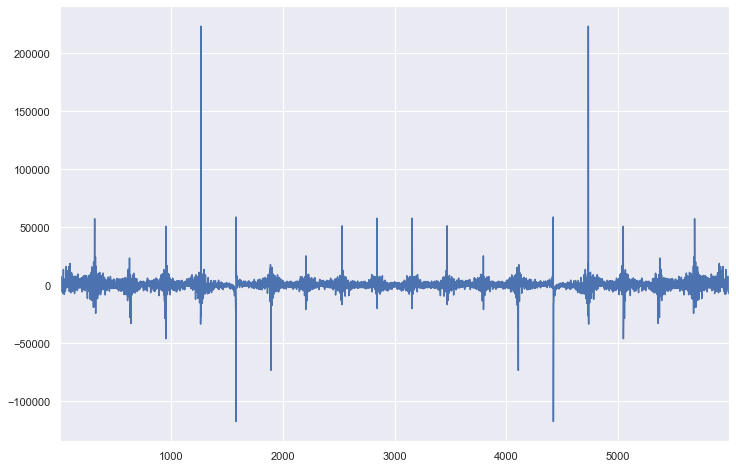

In [14]:
pd.Series(data.ch1)[1:].plot()

In [15]:
X = np.linspace(0, np.pi, 6000)
y = np.sin(50 * X)

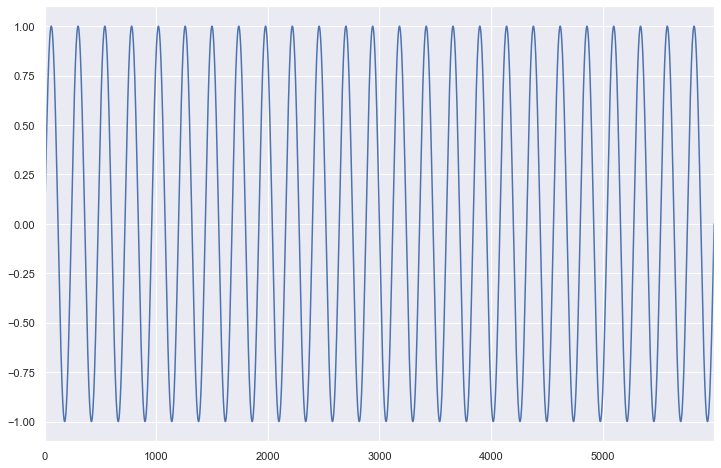

In [16]:
pd.Series(y).plot()

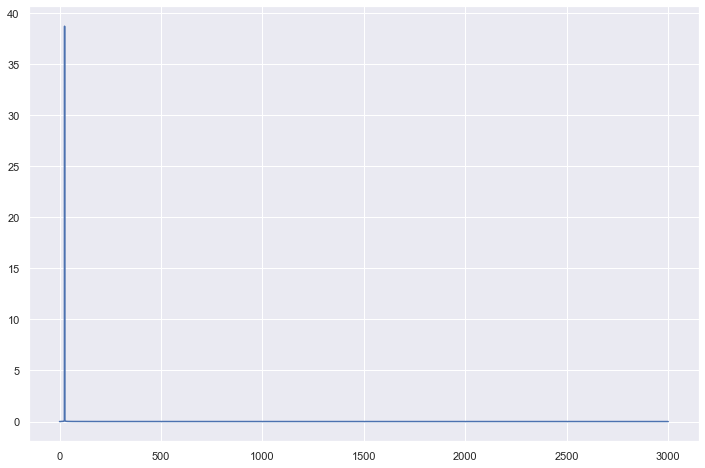

In [17]:
fourier = np.fft.rfft(y, norm='ortho')
plt.plot(np.abs(fourier))

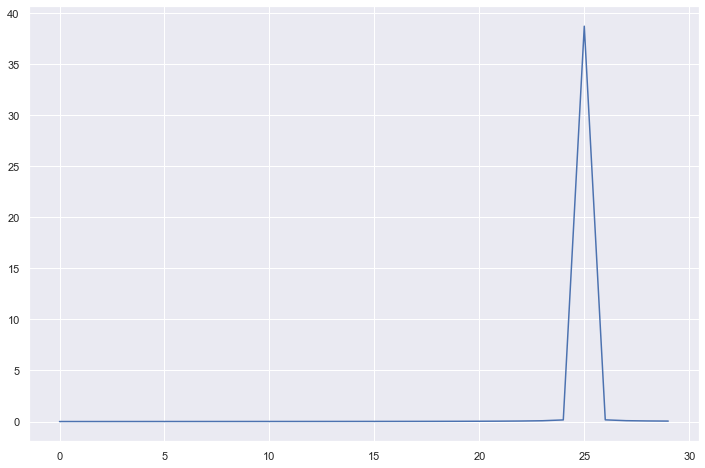

In [18]:
plt.plot(np.abs(fourier)[:30])

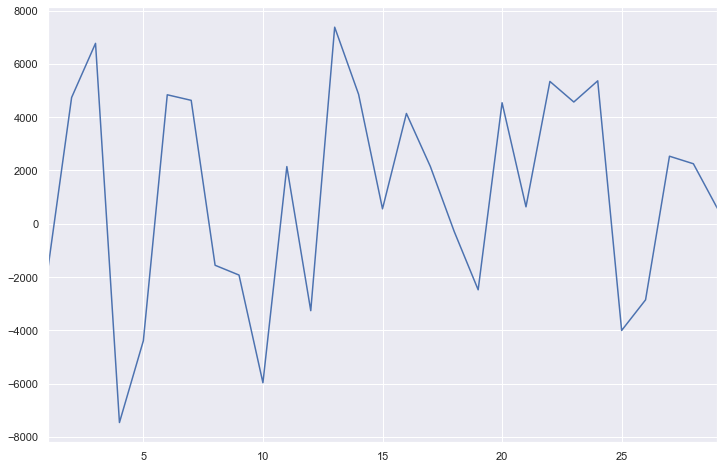

In [19]:
pd.Series(data.ch1)[1:30].plot()

In [20]:
for idx in data.columns:
    data[idx][25] = 0

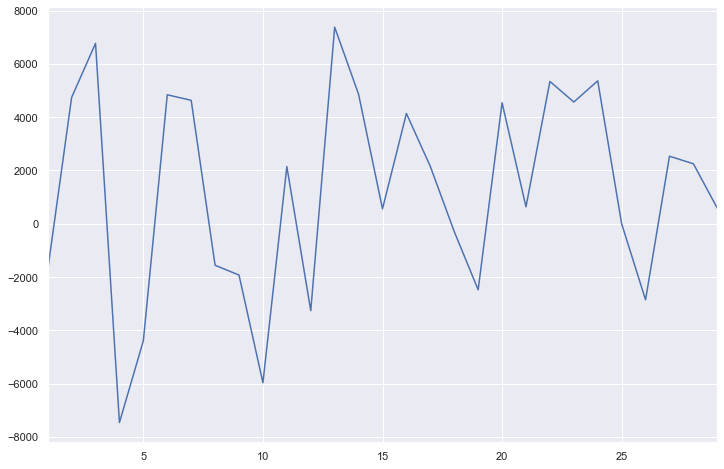

In [21]:
pd.Series(data.ch1)[1:30].plot()

In [22]:
newData = data * 2

In [23]:
newData.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,6.125144e+06-3.721311e-12j,6.062414e+06-3.673899e-12j,6.151966e+06-3.810398e-12j,6.089202e+06-3.868651e-12j,6.129116e+06-3.673683e-12j,6.148176e+06-3.879505e-12j,6.017302e+06-3.752940e-12j
1,-1.051727e+04-4.445339e+03j,-3.493781e+03+7.893412e+02j,3.260426e+02+8.719122e+02j,2.630511e+03+2.035007e+03j,8.299024e+02+8.076864e+01j,-1.177867e+03-3.218473e+02j,-6.697031e+02-3.718466e+02j
2,1.214069e+04+1.922030e+03j,9.477456e+03+1.441659e+03j,-2.123939e+02+6.052413e+02j,-3.649158e+02-7.214943e+02j,3.317883e+03-1.397741e+03j,-3.676012e+02+6.071050e+02j,9.061241e+02-2.226775e+03j
3,1.392891e+04+3.871263e+03j,1.354294e+04+8.065740e+03j,1.982310e+03+2.409708e+02j,2.559788e+03-1.944481e+03j,3.100714e+03-7.458990e+02j,-1.448804e+03+8.382409e+02j,7.173674e+03+6.736563e+02j
4,-1.530703e+04+1.095718e+03j,-1.492856e+04+6.006114e+03j,-7.177758e+02-1.125013e+03j,5.103002e+03+7.205570e+03j,1.621910e+03-1.779351e+03j,-1.656247e+03+3.764455e+02j,-4.727509e+03+1.160586e+04j


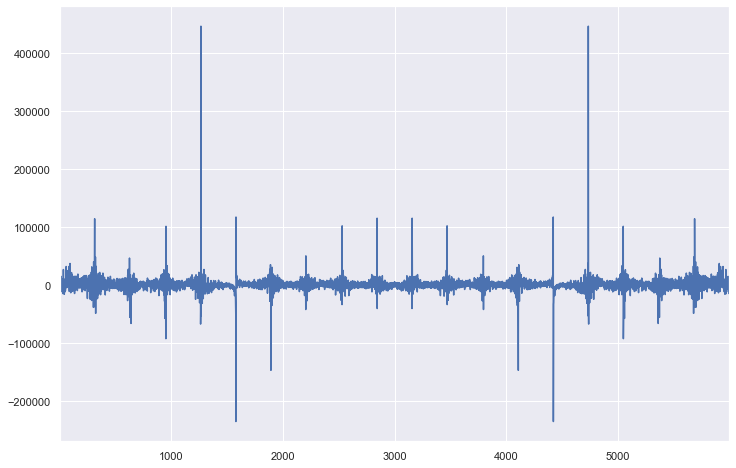

In [24]:
newData.ch1[1:].plot()

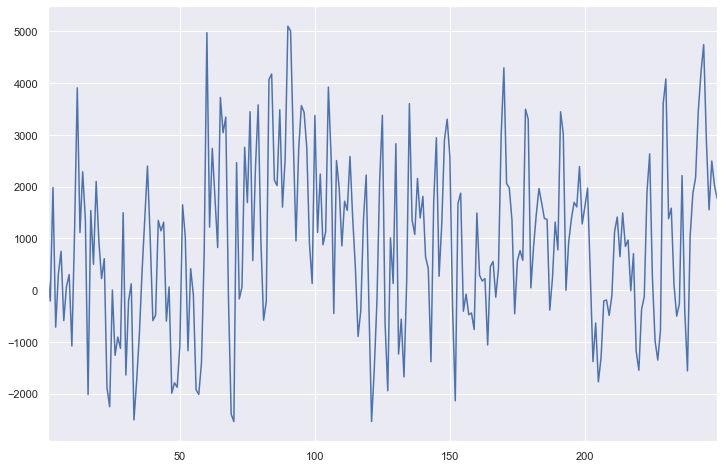

In [25]:
newData.ch2[1:250].plot()

In [26]:
reverseF = newData.apply(ifft)

In [27]:
reverseF.head()

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,2032.410652+0.251433j,1571.335783-0.297749j,1198.197166+0.011439j,2017.636725-3.431134j,953.946594-0.112090j,696.982083+0.271432j,178.711991-0.279082j
1,948.403930+0.262096j,1117.343119-0.262680j,1046.196799+0.016597j,1221.728037-3.544175j,851.949546-0.113449j,1244.974641+0.297047j,988.719052-0.260349j
2,1704.396931+0.272580j,1511.349535-0.227431j,1000.196297+0.021742j,2023.822276-3.654788j,721.952534-0.114731j,1446.966531+0.322458j,1132.725621-0.241437j
3,1362.389659+0.282877j,1383.355026-0.192027j,980.195661+0.026873j,1945.919379-3.762895j,1257.955553-0.115935j,1230.957759+0.347648j,1084.731692-0.222360j
4,1208.382121+0.292980j,1197.359589-0.156490j,1524.194890+0.031986j,1998.019278-3.868424j,1239.958603-0.117058j,1120.948330+0.372600j,1026.737262-0.203130j


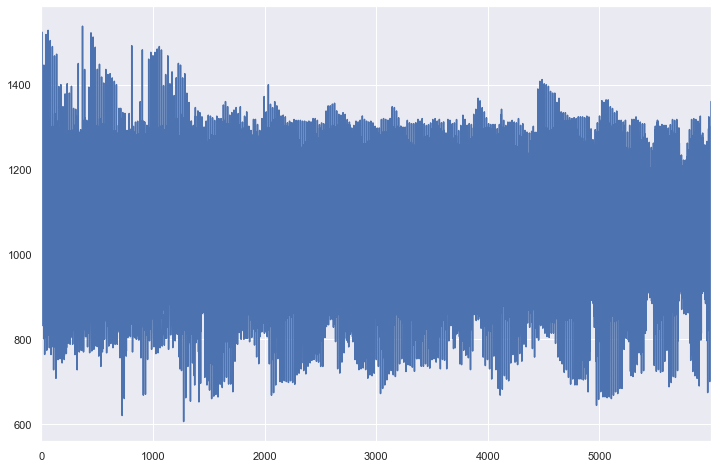

In [28]:
reverseF.ch2.plot()

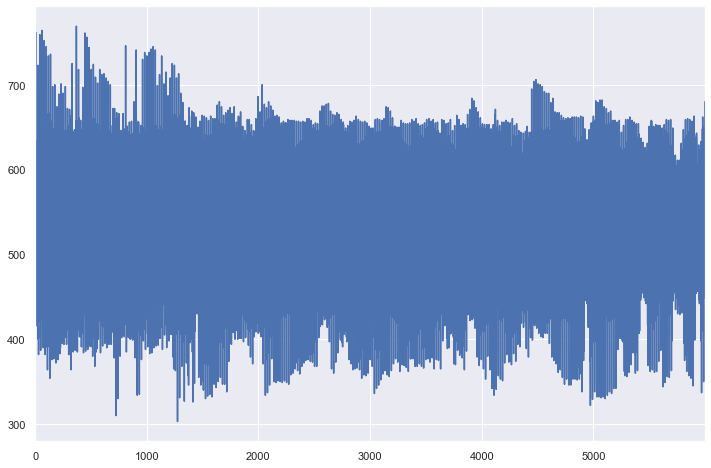

In [29]:
df.ch2.plot() # old 

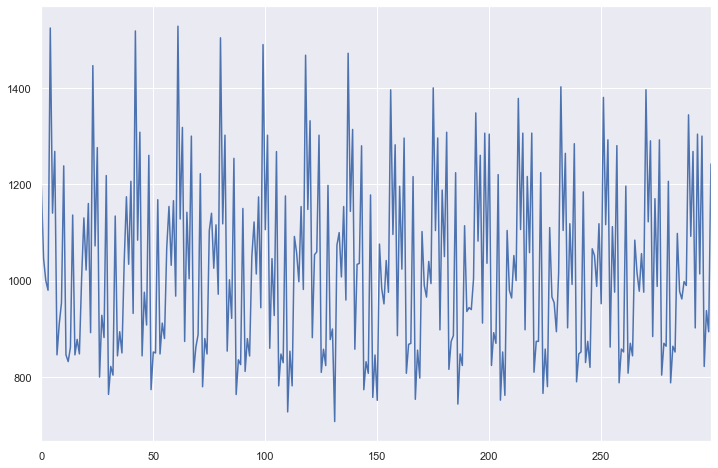

In [30]:
reverseF.ch2[:300].plot()

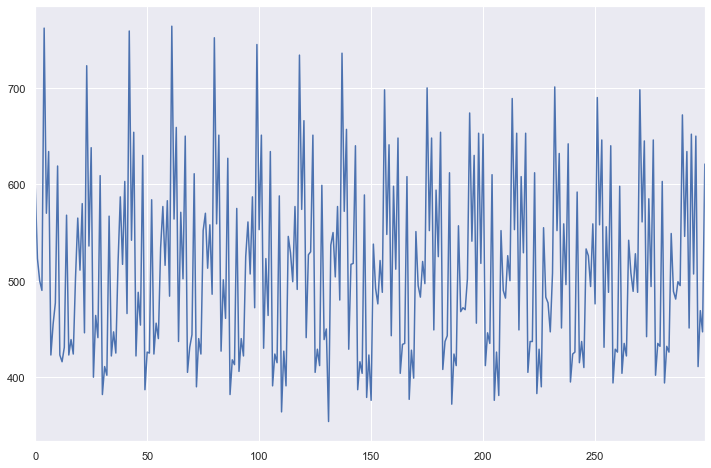

In [31]:
df.ch2[:300].plot() # old 

Test hypotes of y = sin(2* pi * w * x)

In [143]:
X = np.linspace(0, 2* np.pi, 6000)
y = np.sin((6000/5)*X)

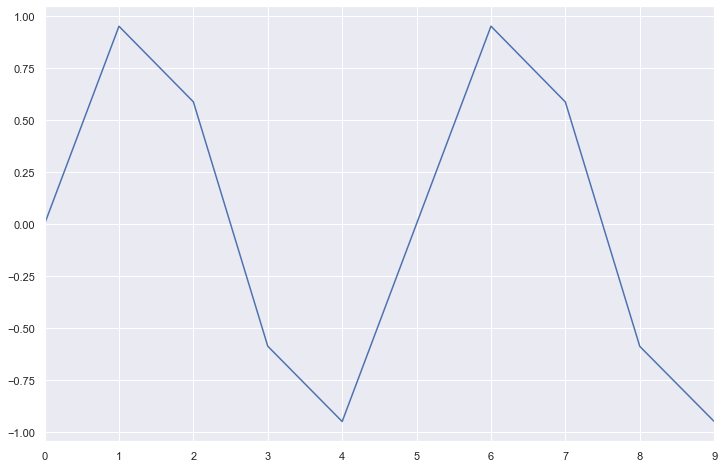

In [146]:
pd.Series(y[:10]).plot()


In [139]:
X = np.linspace(0, 2* np.pi, 6)
y = np.sin(X)

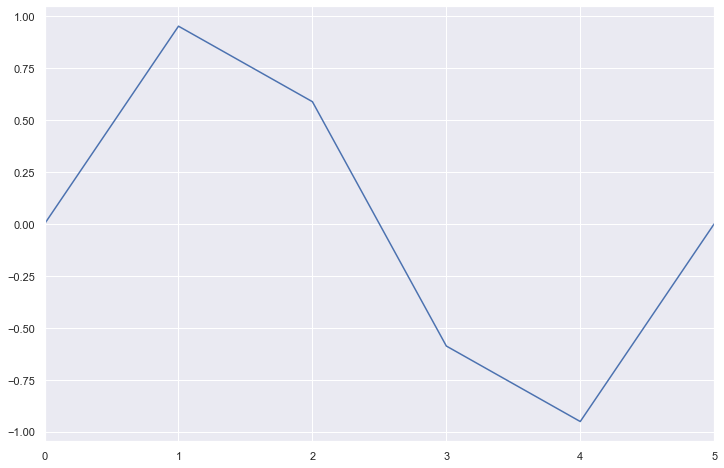

In [142]:
pd.Series(y[:10]).plot()

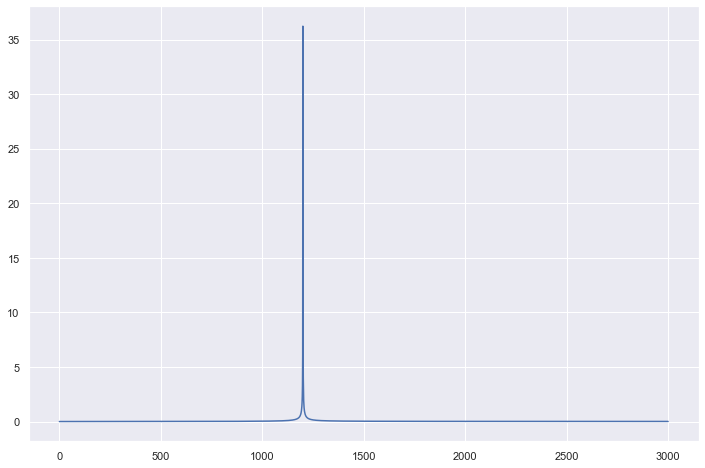

In [179]:
fourier = np.fft.rfft(y, norm='ortho')
plt.plot(np.abs(fourier))

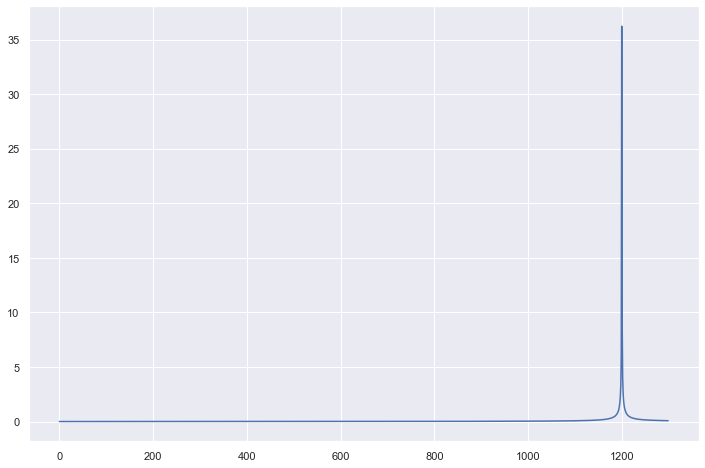

In [148]:
plt.plot(np.abs(fourier)[:1300])

In [221]:
data = df.apply(fft)
data_mod = data
for idx in data_mod.columns:
    data_mod[idx] = np.sqrt(data_mod[idx].imag ** 2 + data_mod[idx].real ** 2)

C:\Users\markc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  after removing the cwd from sys.path.
C:\Users\markc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  after removing the cwd from sys.path.


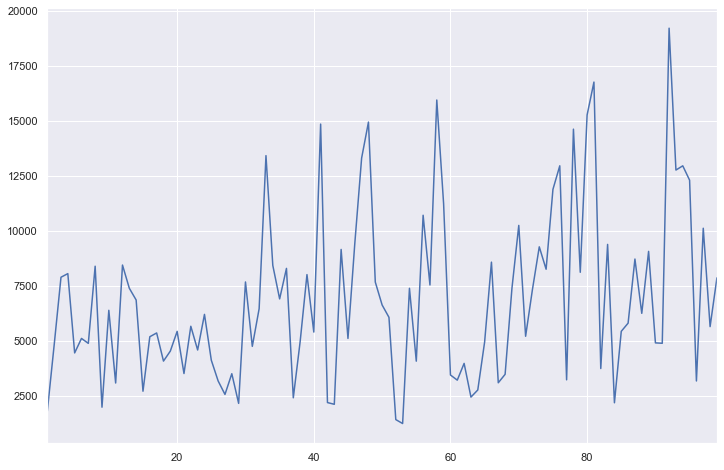

In [222]:
pd.Series(data_mod.ch1)[1:100].plot()

In [223]:
for idx in data.columns:
    data[idx][1200] = 0

In [209]:
data

,ch0,ch1,ch2,ch3,ch4,ch5,ch6
0,3.062572e+06,3.031207e+06,3.075983e+06,3.044601e+06,3.064558e+06,3.074088e+06,3.008651e+06
1,5.709073e+03,1.790919e+03,4.654392e+02,1.662892e+03,4.169118e+02,6.105235e+02,3.830052e+02
2,6.145943e+03,4.793239e+03,3.207133e+02,4.042640e+02,1.800141e+03,3.548616e+02,1.202039e+03
3,7.228436e+03,7.881422e+03,9.984514e+02,1.607289e+03,1.594584e+03,8.369112e+02,3.602617e+03
4,7.673101e+03,8.045731e+03,6.672438e+02,4.414773e+03,1.203815e+03,8.492447e+02,6.265887e+03
...,...,...,...,...,...,...,...
5995,4.457773e+03,4.437991e+03,2.291690e+02,2.670701e+03,1.087391e+03,5.840642e+02,3.929766e+03
5996,7.673101e+03,8.045731e+03,6.672438e+02,4.414773e+03,1.203815e+03,8.492447e+02,6.265887e+03
5997,7.228436e+03,7.881422e+03,9.984514e+02,1.607289e+03,1.594584e+03,8.369112e+02,3.602617e+03
5998,6.145943e+03,4.793239e+03,3.207133e+02,4.042640e+02,1.800141e+03,3.548616e+02,1.202039e+03


In [210]:
data_new = data * (50 / 1200)

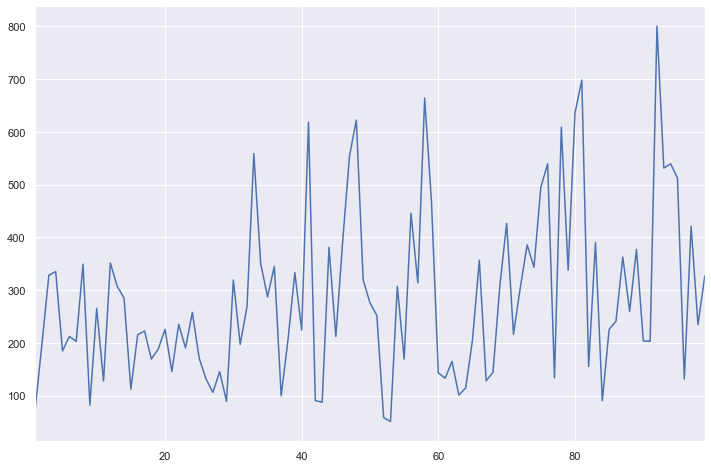

In [211]:
pd.Series(data_new.ch1)[1:100].plot()

In [212]:
for idx in data_new.columns:
    data_new[idx][50] = 0

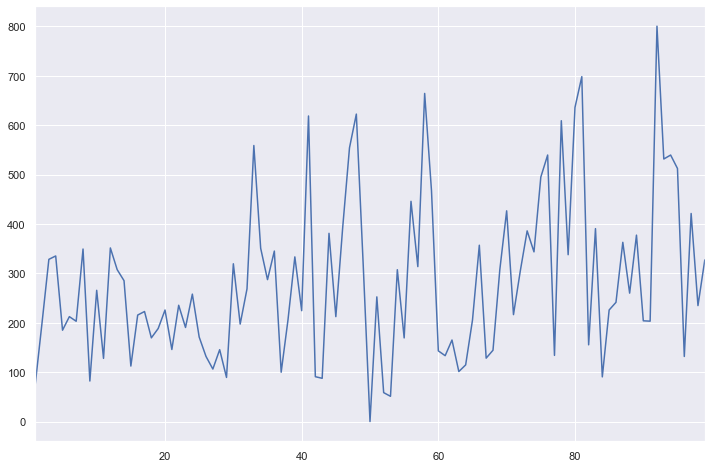

In [213]:
pd.Series(data_new.ch1)[1:100].plot()

In [236]:
reverseF = data.apply(ifft)
reverseF_mod = reverseF.copy()

In [237]:
for idx in reverseF.columns:
    reverseF_mod[idx] = np.sqrt(reverseF[idx].imag ** 2 + reverseF[idx].real ** 2)

C:\Users\markc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `imag` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.imag(ser.to_numpy())` or `ser.to_numpy().imag`.
  
C:\Users\markc\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: `real` is deprecated and will be removed in a future version. To eliminate this warning for a Series `ser`, use `np.real(ser.to_numpy())` or `ser.to_numpy().real`.
  


C:\Users\markc\Anaconda3\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


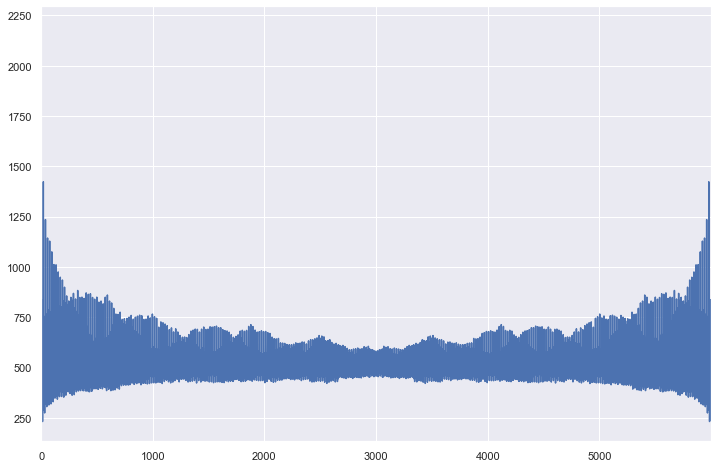

In [238]:
reverseF.ch2.plot()

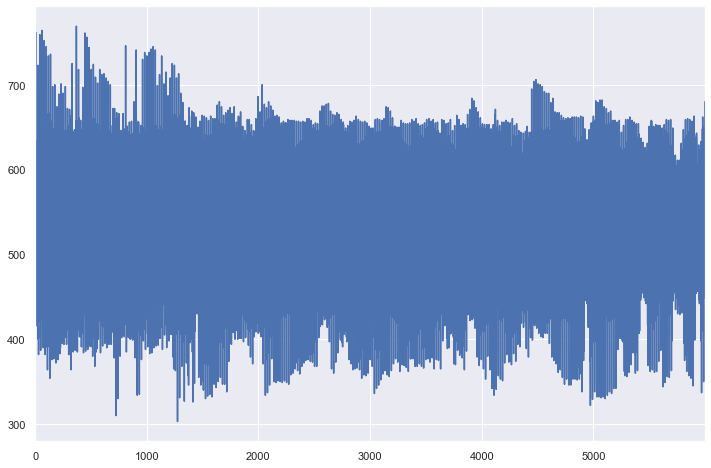

In [239]:
df.ch2.plot()

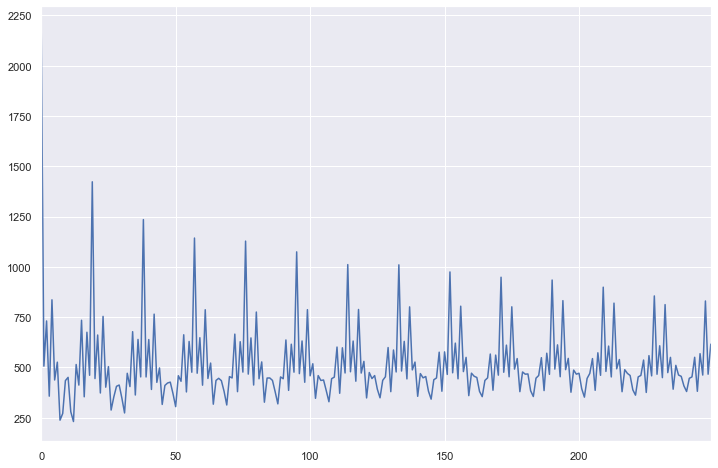

In [240]:
reverseF[:250].ch2.plot()

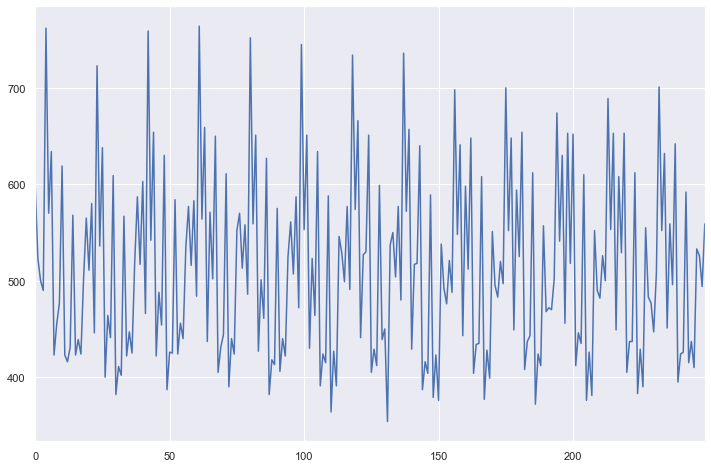

In [241]:
df.ch2[:250].plot()